# Дипломная работа

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from scipy import stats


## 1. Загрузите файл HR.csv в pandas dataframe

In [22]:
df = pd.read_csv('hr.csv')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Рассчитайте основные статистики для переменных(среднее, медиана, мода, мин/макс, сред.отклонение).

#### Вспомогательные функции

In [23]:
def moda(column):
    print(column.name)
    print('')
    print('Мода: ', column.mode()[0])
    print('')
    print(column.value_counts())
    print('------------')
    
    
def unique(column):
    print('Уникальные значения: ', list(column.unique()))
    
    
def box(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)
    print('Мин. граница: ', lower_bound)
    print('Макс. граница: ', upper_bound)

#### Смотрим общую информацию, пропусков нет

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Смотрим меткрики для количественных данных

In [26]:
df_number = df.iloc[:, 0:5]

df_number.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


#### Смотрим метрики для качественных данных

In [27]:
moda(df.Work_accident)
moda(df.left)
moda(df.promotion_last_5years)
moda(df.department)
moda(df.salary)

Work_accident

Мода:  0

0    12830
1     2169
Name: Work_accident, dtype: int64
------------
left

Мода:  0

0    11428
1     3571
Name: left, dtype: int64
------------
promotion_last_5years

Мода:  0

0    14680
1      319
Name: promotion_last_5years, dtype: int64
------------
department

Мода:  sales

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64
------------
salary

Мода:  low

low       7316
medium    6446
high      1237
Name: salary, dtype: int64
------------


## 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [28]:
df_number.corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842
number_project,0.022077,0.266267,1.000000,0.306987,0.195025
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000


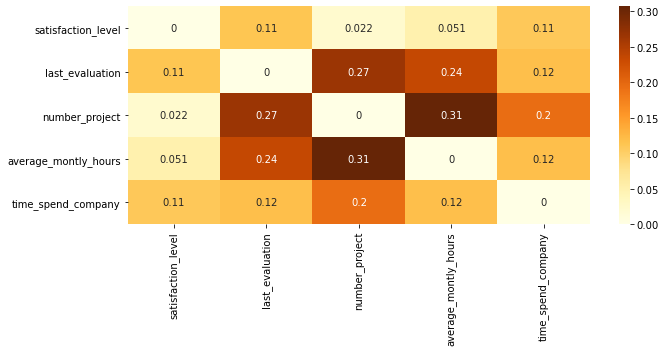

In [29]:
corr = df_number.corr(method='kendall').abs()      
np.fill_diagonal(corr.values, 0)

sns.heatmap(corr, cmap="YlOrBr", annot=True)
plt.tight_layout()

###### Cамые скоррелированные переменные: 

Кол-во проектов (number_project) и Среднее количество часов на рабочем месте в месяц (average_montly_hours) - прямая корреляция (коэф. 0.306987)

###### Cамые менее скоррелированные переменные: 

Кол-во проектов (number_project) и Уровень удовлетворенности работой (satisfaction_level) - коэф. 0.022077

## 4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [30]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

## 5. Показать распределение сотрудников по зарплатам

In [31]:
df_salary = df.salary.value_counts().rename_axis('Salary').reset_index(name='counts')

df_salary['percent'] = round((df_salary['counts'] / df_salary['counts'].sum()) * 100, 2)

df_salary

,Salary,counts,percent
0,low,7316,48.78
1,medium,6446,42.98
2,high,1237,8.25


<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам'}>

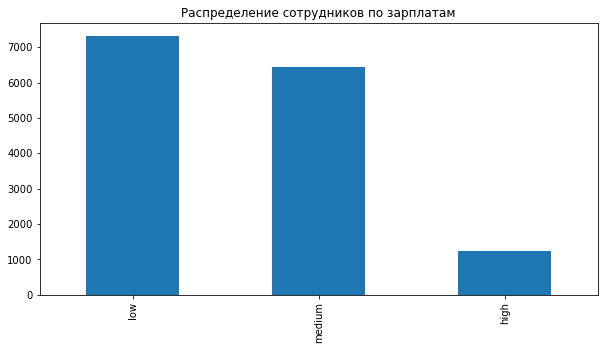

In [32]:
df.salary.value_counts().sort_values(ascending = False).plot(kind='bar', title='Распределение сотрудников по зарплатам')

## 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [33]:
salary_df = df[['department', 'salary']].pivot_table(index='department', columns='salary', aggfunc=len).reset_index()
salary_df = salary_df[['department', 'low', 'medium', 'high']]

salary_df

salary,department,low,medium,high
0,IT,609,535,83
1,RandD,364,372,51
2,accounting,358,335,74
3,hr,335,359,45
4,management,180,225,225
5,marketing,402,376,80
6,product_mng,451,383,68
7,sales,2099,1772,269
8,support,1146,942,141
9,technical,1372,1147,201


Text(0.5, 0, '')

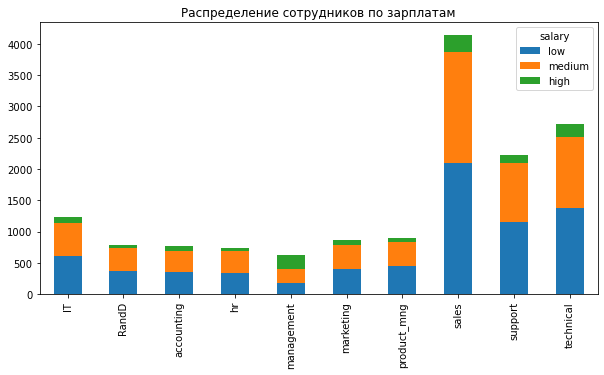

In [34]:
salary_df.set_index('department').plot(kind='bar', title='Распределение сотрудников по зарплатам', stacked=True).set_xlabel('')

## 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Пороговый уровень статистической значимости принимаю за 0.05, так как ошибка не критична.

<i>H0 - Сотрудники с высоким окладом проводят  столько же или меньше времени на работе, чем сотрудники с низким окладом</i>

<i>H1 - Сотрудники с высоким окладом в среднем проводят больше времени на работе, чем сотрудники с низким окладом</i>

In [20]:
alpha = 0.05

low = df[df.salary == 'low'].average_montly_hours
high = df[df.salary == 'high'].average_montly_hours

result = stats.ttest_ind(low, high, alternative='greater')

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу. Сотрудники с высоким окладом проводят столько же или меньше времени на работе, чем сотрудники с низким окладом') 
else:
    print('Не отвергаем нулевую гипотезу. Сотрудники с высоким окладом проводят столько же или меньше времени на работе, чем сотрудники с низким окладом')
    
result

Не отвергаем нулевую гипотезу. Сотрудники с высоким окладом проводят столько же или меньше времени на работе, чем сотрудники с низким окладом


Ttest_indResult(statistic=0.7288680398062308, pvalue=0.23305117391336294)

## 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

<b>Доля сотрудников с повышением за последние 5 лет:</b>

In [35]:
df_left = df[df.left == 1]
df_not_left = df[df.left == 0]

In [52]:
def get_promotion_percent(data):
    data_len = len(data.index)
    promotion_len = len(data[data.promotion_last_5years == 1].index)
    return promotion_len / data_len

print('Доля сотрудников с повышением за последние 5 лет:')
print('Уволившиеся сотрудники', str(round(get_promotion_percent(df_left) * 100, 2)) + '%')
print('Неуволившихся сотрудники', str(round(get_promotion_percent(df_not_left) * 100, 2)) + '%')

df.pivot_table(index = 'left', values = 'promotion_last_5years').reset_index()

Доля сотрудников с повышением за последние 5 лет:
Уволившиеся сотрудники 0.53%
Неуволившихся сотрудники 2.63%


,left,promotion_last_5years
0,0,0.026251
1,1,0.005321


<b>Средняя степень удовлетворенности:</b>

In [41]:
print('Уволившиеся сотрудники', round(df_left.satisfaction_level.mean(), 2))
print('Неуволившиеся сотрудники', round(df_not_left.satisfaction_level.mean(), 2))

df.pivot_table(index = 'left', values = 'satisfaction_level').reset_index()

Уволившиеся сотрудники 0.44
Неуволившиеся сотрудники 0.67


,left,satisfaction_level
0,0,0.666810
1,1,0.440098


<b>Среднее количество проектов:</b>

In [54]:
print('Уволившиеся сотрудники', round(df_left.number_project.mean(), 1))
print('Неуволившиеся сотрудники', round(df_not_left.number_project.mean(), 1))

df.pivot_table(index = 'left', values = 'number_project').reset_index()

Уволившиеся сотрудники 3.9
Неуволившиеся сотрудники 3.8


,left,number_project
0,0,3.786664
1,1,3.855503


## 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [59]:
droped_df = df.drop(['department', 'salary', 'left'], axis=1)

X = droped_df
y = list(df['left'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

droped_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [60]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

result.head()

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [61]:
accuracy_score(y_test, lda.predict(X_test))

0.7557777777777778

In [62]:
lda.coef_

array([[-4.57738626e+00,  6.13822647e-01, -2.10613368e-01,
         4.55442333e-03,  2.21314862e-01, -1.05033789e+00,
        -1.08559074e+00]])

In [63]:
from sklearn.metrics import plot_confusion_matrix

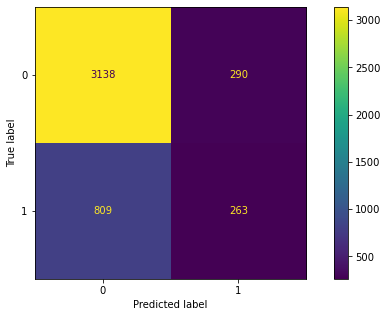

In [64]:
plot_confusion_matrix(lda, X_test, y_test)  
plt.show()  

Качество модели 75% - довольно высокое